# Les méthodes numériques d'intégration

l'objectif poursuivit ici est simple : nosu voulons approcher la valeur numérique d'une intégrale.

mais que cela veut dire ? et comment faire pour y parvenir ? le présent Notebook, fait l'objet de ces problématiques.

En effet si nous aovns une intégrale de la forme suivante 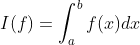


les méthodes d'intégrations numériques concistent à approcher cette intégrale I(f) par un nombre 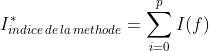

je me permet ici de nous faire une petite parenthèse ( Jusque là tout va bien, ceci nous paraît logique puisque une intégrale c'est la somme des infinements petits, dasn des cas particuliers, elle permet de traiter efficacement et à la fois des variables discrètes et continues ).

Ce nombre ci-haut, nous l'avons exprimé de façon générale car en réalité et selon le cours, la valeur de p varie selon la méthode que nous employons, aisni, elle vaut n-1 lorsqu'il s'agit de la méthode des rectangles médian et des trapèzes et, elle vaut (n/2)-1 lorsqu'il s'agit e la méthode de simpson. Encore faudrait-il aussi préciser comment devons-nous définir I(f) pour chaque méthode.

Ainsi, pour mieux comprendre comment cela se passe nous répondrons aux questions suivantes en plus de devoir implémenter les algorithmes et d'illustrer concrètement ses méthodes par quelques problèmes de calcul d'intégrale et de comparer des résultats théoriques proprement dits tel que cela nous a été demandé :

- Quid de chaque méthode ?
- Comment allons-nous définir et mesurer la précision de chaque formule ?
- Quand la convergence a-t-elle lieu et que peut être l'expression de l'erreur dans chaque cas ?
- Comment devons nous procéder pour construire les formules de ces méthodes en python

### La méthode des rectnagles :

Cette méthode sert à encadrer l'air d'un domaine sous la courbe d'une fonction qui est la somme d'air recherché entre les sommes des rectanges encadré. Dans les images puisé ci-dessous sur wikipedia, on peut constater que si on augmente le nombre de rectange, l'amplitude de l'intervale diminue.On utilisera ce qu'on appel des points de discrétizations xi tel que :
$$
x_i = x_0+ih
$$
et une variable h qui sera la largeur qui subdivise l'intervelle [a,b] n fois tel que :  $h = \frac{b-a}n$

La méthode des rectangles (https://en.wikipedia.org/wiki/Riemann_sum) s'écrit :
$$
\int_a^bf(x)\ \mathrm{d}x \simeq I^1_{N,\mathrm{g}}(f,a,b) =  \dfrac{b-a}{n}\sum_{i = 1}^{n} f(x_{i-1}),
$$

<img src="https://upload.wikimedia.org/wikipedia/commons/1/19/Riemann_sum_(leftbox).gif" width="30%">

pour les rectangles à gauche, et
$$
\int_a^bf(x)\ \mathrm{d}x \simeq I^1_{N,\mathrm{d}}(f,a,b) =  \dfrac{b-a}{n}\sum_{i = 1}^{n} f(x_{i}),
$$

<img src="https://upload.wikimedia.org/wikipedia/commons/6/61/Riemann_sum_(rightbox).gif" width="30%">

pour les rectangles à droite.

<!--<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Integration_rectangle.svg" width="40%">-->

La compléxité de la méthode des rectangles est linéaire ce qui peut poser ds problèmes pour de très grandes valeurs de n.

Conditions de convergences :
* il faut veiller à ce que les fonctions à traiter soient continues, positives et croissante.


### La méthode des trapèzes :

lorsqu'on représente graphiquement une courbe, il existe une zone sous cette courbe. le principe de la méthode des trapèzes concicste justement à assimiler la région sous la courbe. La courbe dont il est question, représente une fonction définie sur un segment [a,b] à un trapèze au quel on calculera son aire. Dans la méthode de Trapèze comme dans les autres méthodes, on utilisera  des points de discrétizations xi tel que :
$$
x_i = x_0+ih
$$
et une variable h qui sera la largeur  qui subdivise l'intervelle [a,b] n fois tel que : $h = \frac{b-a}n$

Enfin, La méthode des trapèzes (https://en.wikipedia.org/wiki/Trapezoidal_rule) s'écrit :
$$
    \int_a^bf(x)\ \mathrm{d}x \simeq I^2_{N}(f,a,b) = \dfrac{b-a}{n}\sum_{i = 1}^{n} \frac{f(x_{i-1}) + f(x_{i})}2.
$$

<img src="https://upload.wikimedia.org/wikipedia/commons/7/7e/Trapezium2.gif" width="40%">
<!--<img src="https://upload.wikimedia.org/wikipedia/commons/0/03/Integration_trapezoid.svg" width="40%">-->

c'est bien beau tout ça,mais qu'en est - il  de sa complexité ?
D'après mes recherches, on dit que la méthode de trapèze est plus optimale que la méthode de simpson mais plus complexes que la méthodes des rectangles. Je nous propose de découvrir le comment, plus bas.

Conditions de convergences :
* Il faut que la fonction de départ soit de classe 2 c'est à dire 2 fois continûment différentiable sur [a,b] en plus simple la fonction doit être continue et admet une dérivée seconde. Ma petite astuce ici est de considérer par convention toutes les fonctions polynomiales comme étant déjà continue contrairement aux fonctions rationelles et irrationnelle auxquelles nous devons d'abord étudier la continuité.

### La méthode de simpson :

Enfin, avant d'aborder l'implémentation de chaque méthode, nous allons aborder la méthode de simpson. On verra que par la méthode de trapèze (tel que vu au cours d'ailleurs) donne des valeurs un peu plus loin de la valeur exacte parce que le défaut de cette méthode se situe au moment ou on tente de couper un arc par une droite afin d'en ressortir un trapèze ce qui explique que le résultat est un peu éloigné. Bien qu'il existe une autre méthode du nom de "Hermite" qui pemret de corriger cette erreur quadratique, on doit comprendre et retenir que la méthode de simpson peut être vue comme "une alternative" qui permet "d'éviter" cette erreur. Elle conciste à grouper des point (par convention 3) consécutif, de la courbe de la fonction d'origine f(x) et de remplacer l'arc passant par ces trois points, par un arc de parabole tout simplement donc au lieu de tracer des droites on va carrément tracer des courbes et pour ce faire on aura besoin du point milieu de chaque segment ou sous-intervalle de l'intervalle de départ. Comme pour les autres méthodes, on utilisera  des points de discrétizations xi tel que :
$$
x_i = x_0+ih
$$
et une variable h qui sera la largeur  qui subdivise l'intervelle [a,b] n fois tel que : $h = \frac{b-a}n$

La méthode de Simpson (https://en.wikipedia.org/wiki/Simpson%27s_rule) s'écrit :
$$
    \int_a^bf(x)\ \mathrm{d}x \simeq I^3_{N}(f,a,b) = \dfrac{b-a}{n}\sum_{i = 0}^{p-1} \frac 1 6 \left(f(x_{i-1}) + 4 f(x_{i-1/2})+ f(x_{i}) \right),
$$
où $x_{i-1/2} = \frac{x_{i-1}+x_{i}}{2}$.

<img src="https://upload.wikimedia.org/wikipedia/commons/c/ca/Simpsons_method_illustration.svg" width="25%">
<!--
<img src="https://upload.wikimedia.org/wikipedia/commons/6/67/Simpsonsrule2.gif" width="40%">
-->

Complexité :
La complexité de cette méthode à trois niveau est dite polynomiale de degré 3 (voir même de degré 2 selon le cas que nous traitons).

Conditions de convergence :
Honnêteté scientifique oblige, nous n'avons malheureusement pas su présenter en plus simple les critères de convergences de cette méthode. Nonobstant cela, afin de faire de ce TP Notebook une reférence parfaite aux intégrations numériques, une proposition ou information suplémentaire serait la bienvenue.


In [33]:
import numpy as np
from math import sin, pi, exp, log, cos
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Calcul théorique 
Sur papier ou avec une calculatrice , on calcule la valeur explicite théorique de :
$$
    \int_a^b f(x)\ \mathrm{d}x
$$

Nous implémentons ci-desosus une méthode vt comme valeur theorique
qui calcul une intégrale, elle nous servira pour les vérifications.

In [2]:
#def vt(f): 
    #return np.f

## La méthode des rectangles en python

In [34]:
def rectangle(f,a,b,n):
    h = (b - a) / n  # La largeur h des rectangles
    integrale = 0  # somme des aires initialement nulle puisque 
    #une intégrale est une somme!    
    for i in range(n):
        xi = a + (i + 0.5) * h   # abscisse des "points médians" (points de discrétizations)
        integrale = integrale + h * f(xi)   # ajouterà la somme précédente l'aire du rectangle  
    return integrale


Exemple : considérons la fonction définies sur [0,1] avec n=4 par :
$$
    f(x) = \sin(x),
$$
et prolongées par 1-périodicité.

Appliquons la méthode des rectangles pour résoudre cette intégrale simple :
$$
    \int_0^1 sin(x)\ \mathrm{d}x
$$

#### résolutions par la méthode des rectangles :

In [35]:
f= lambda x: sin(x)
a=0
b=1
n=4
va =  rectangle(f, a, b, n) #va pour : Valeur Approximé de l'intégrale
print("résultat numérique de la valeur approximée de l'intégrale : ")
print(va)

résultat numérique de la valeur approximée de l'intégrale : 
0.4608970094119411


#### calcul théorique :

In [40]:
# Valeur théorique
def vt():
        return 1 - np.cos(1)

In [38]:
print("le résultat théorique de l'intégrale est : ")
print(vt())

le résultat théorique de l'intégrale est : 
0.459697694132


### Evaluation des erreurs

In [41]:
erreur_relative_g = np.abs((va - vt()) / vt())
erreur_relative_d = np.abs((va - vt()) / vt())
#
print("Erreur relative avec rectangle à gauche = " + str(erreur_relative_g) + ".")
print("Erreur relative avec rectangle à droite = " + str(erreur_relative_d) + ".")

Erreur relative avec rectangle à gauche = 0.00260892167916.
Erreur relative avec rectangle à droite = 0.00260892167916.


Comme nous pouvons le constater, en comparant le résultat théorique et le résultat obtenu après application d ela méthode des rectangles il y'a une erreur quadratique de 0.00260892167916 aussi bien du coté gaudche que du coté droite des rectangles. Cette erreur représente d'autre par l'écart que nous avions abordé plus haut.

## La méthode des trapèzes en python

In [42]:
def trapeze(f,a,b,n) :
    h=(b-a)/float(n) # La largeur h des rectangles
    integrale=0.5*(f(a)+f(b))
    for i in range(1,n) :
        integrale=integrale+f(a+i*h)
    return h*integrale


Exemple : considérons la fonction définies sur [0,1] avec n=4 par :
$$
    f(x) = \sin(x),
$$
et prolongées par 1-périodicité.

Appliquons la méthode des trapèzes pour résoudre cette intégrale simple :
$$
    \int_0^1 sin(x)\ \mathrm{d}x
$$

In [46]:
f= lambda x: sin(x)
a=0
b=1
n=4
va =  trapeze(f, a, b, n) #va pour : Valeur Approximé de l'intégrale
print("résultat numérique de la valeur approximée de l'intégrale : ")
print(va)

résultat numérique de la valeur approximée de l'intégrale : 
0.45730093757150203


on peut remarquer ici que le résultat calculé de l'intégrale par la méthode des trapèze se situe entre le résultat calculé par la méthode des reectangles et, le résultat théoriques chose qui nous pousse à dire que nous avons minimiser l'erreur.

In [47]:
erreur_relative_trapeze = np.abs((va - vt()) / vt())

print("Erreur relative avec la méthode des trapèzes = " + str(erreur_relative_trapeze) + ".")

Erreur relative avec la méthode des trapèzes = 0.00521376676662.


## La méthode de simpson en python

In [48]:
def simpson(f, a, b, n):
    h = (b - a) / n
    somme = (f(a) + f(b)) / 2 + 2 * f(a + h / 2)  # On initialise la somme
    x = a + h           # La somme commence à x_1 
    for i in range(1, n): # On calcule la somme 
        somme += f(x) + 2 * f(x + h / 2)
        x += h
    return somme * h/3   # On retourne cette somme fois le pas / 3     

Exemple : considérons la fonction définies sur [0,1] avec n=4 par :
$$
    f(x) = \sin(x),
$$
et prolongées par 1-périodicité.

Appliquons la méthode des trapèzes pour résoudre cette intégrale simple :
$$
    \int_0^1 sin(x)\ \mathrm{d}x
$$

In [49]:
f= lambda x: sin(x)
a=0
b=1
n=4
va =simpson(f, a, b, n) #va pour : Valeur Approximé de l'intégrale
print("résultat numérique de la valeur approximée de l'intégrale : ")
print(va)

résultat numérique de la valeur approximée de l'intégrale : 
0.4596983187984614


On s'éloigne un peu plus du résultat obtenu en trapèze n se rapprochant un peu plus du résultat obtenu de rectangle.

In [51]:
erreur_relative_simpson = np.abs((va - vt()) / vt())

print("Erreur relative avec la méthode de Simpson = " + str(erreur_relative_simpson) + ".")

Erreur relative avec la méthode de Simpson = 1.3588638991e-06.


constat : l'erreur est vraiment minimisé!!!

### EXERCICES

essayons de résoudre ces exercices en utilisant les méthodes implémentés plus haut :
avant tout, je propose de calculer theoriquement toutes ces intégrales au choix avant de présenter leur résultat selon les 3 méthodes pour ensuite comparer le résultat théorique et le résultat calculé.

$$
1) \int_0^\frac{\pi}{2} \sin(x)\, dx,
$$
$$
2) \int_0^\frac{\pi}{2} \cos(x)\, dx,
$$
$$
3) \int_1^2 \log(x)\, dx,
$$
$$
4) \int_0^1 e^x\, dx,
$$
$$
5) \int_{-1}^1 x^3+1\, dx,
$$

### calcul de la valeur théorique de chaque intégrale :

In [52]:
# Valeurs théoriques.
def vt(i):
    if i == 1:
        return -cos(pi/2)+(cos(0))
    elif i == 2:
        return sin(pi/2)-sin(0)
    elif i == 3:
        return -(np.log(2.718282)-2*np.log(2))#e = 2,718282
    elif i == 4:
        return (2.718282)-1 #e = 2,718282
    elif i == 5:
        return 2
    else:
        print("l'intégrale à résoudre doit être compris entre 1 et 5")
        return 0 

In [53]:
i=0
print("pour quelle intégrale aimeriz-vous connaître la valeur theorique ? (1,...,5)")
print("intégrale numéro : \n")
i = int (input())
integrale=vt(i)
print("\n")
print("la valeur theorique de cette intégrale est  : ")
print(integrale)

pour quelle intégrale aimeriz-vous connaître la valeur theorique ? (1,...,5)
intégrale numéro : 

1


la valeur theorique de cette intégrale est  : 
0.9999999999999999


In [54]:
#soient nos fonctions :
d= lambda x:sin(x)  #pour integrale 1
e= lambda x:cos(x)  #pour integrale 2
f= lambda x:log(x)  #pour integrale 3
g= lambda x:exp(x)  #pour integrale 4
h= lambda x:(x**3)+1 #pour integrale 5
#choix de n
n=4
#Valeurs theorique de cahque integrale
print("Les valeurs théoriques de chaque intégrale : \n")
print("1) " +str(vt(1)))
print("2) " +str(vt(2)))
print("3) " +str(vt(3)))
print("4) " +str(vt(4)))
print("5) " +str(vt(5)))
#Méthode de rectangle
print("Valeurs des intégrales après calcul par la Méthode de rectangle : \n")
print("1) " + str(rectangle(d,0,pi/2,n)))
print("2) " + str(rectangle(e,0,pi/2,n)))
print("3) " + str(rectangle(f,1,2,n)))
print("4) " + str(rectangle(g,0,1,n)))
print("5) " + str(rectangle(h,-1,1,n)) + "\n")
#Méthode des trapèzes
print("Valeurs des intégrales après calcul par la Méthode des trapèzes : \n")
print("1) " + str(trapeze(d,0,pi/2,n)))
print("2) " + str(trapeze(e,0,pi/2,n)))
print("3) " + str(trapeze(f,1,2,n)))
print("4) " + str(trapeze(g,0,1,n)))
print("5) " + str(trapeze(h,-1,1,n)) + "\n")
#Méthodes de simpson
print("Valeurs des intégrales après calcul par la Méthode des simpson : \n")
print("1) " + str(simpson(d,0,pi/2,n)))
print("2) " + str(simpson(e,0,pi/2,n)))
print("3) " + str(simpson(f,1,2,n)))
print("4) " + str(simpson(g,0,1,n)))
print("5) " + str(simpson(h,-1,1,n)))
%timeit()

Les valeurs théoriques de chaque intégrale : 

1) 0.9999999999999999
2) 1.0
3) 0.386294298014
4) 1.7182819999999999
5) 2
Valeurs des intégrales après calcul par la Méthode de rectangle : 

1) 1.0064545427995637
2) 1.006454542799564
3) 0.38758831049474823
4) 1.713815279771087
5) 2.0

Valeurs des intégrales après calcul par la Méthode des trapèzes : 

1) 0.9871158009727755
2) 0.9871158009727755
3) 0.38369950940944236
4) 1.7272219045575168
5) 2.0

Valeurs des intégrales après calcul par la Méthode des simpson : 

1) 1.000008295523968
2) 1.000008295523968
3) 0.386292043466313
4) 1.718284154699897
5) 2.0
10000000 loops, best of 3: 23.2 ns per loop


### pour conclure ce tp convenablement nous allons effectuer une comparaison des résultats 1 et 5 :



Il est visible à l'oeil nu que la cinquième intégrale possède la même valeur pour toutes les méthodes, et la valeur approximée est égale à la valeur théorique ce qui signigie qu'il n'y a aucune erreur d'écarts.

Par contre le constat est différet avec la première intégrale, alors que ça velur theorique est de 0.999999 (1), son résultat varie selon chaque méthode tel que la méthode des rectangles s'éloigne de plus en plus du résultat, pendant que la méthode de trapèze s'éloigne de moins en moins et que la méthode de simpson prend de plus en plus de valeur et roijoins d'autre part celle de rectangle.

#### Ainsi une question se pose :
Pour des calcules de précisions, ou dans des domaines d'optimisation tel qu'en machine learning (discipline de l'intelligence artificelle) quelle est la méthode à privilégier ?

D'autant plus que le choix ou la décision à prendre serait fonction du réferntiel dans le quel on se retrouvera que ce soit dasn des cas de minimisation ou de maximisation de profit,  j'estime en mon sens que dans un référentiel commun  il serait préférable pour la première intégrale d'opter pour le résultat obtenu à l'aide de la méthode des trapèzes.

En éspérant que ce TP Notebook pourrait constituer une référence convenable pour  l'intégration numérique, nous vous remercions de votre attention.